This script tests load_data.ipynb.

It runs some examples to double check that the scripts is working correctly.

In [5]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os

import get_halpha_SB

%matplotlib inline

In [11]:
%run 'load_data.ipynb'

machine = 'coho'

### Example 1
Load data from a specific machine (specified so that the data location is known), with a specific resolution and distance.

In [3]:
distance = '50Mpc'; resolution = 100
data_tuple = loaddata(machine=machine,resolution=resolution,distance=distance)
data = data_tuple[0]

data_50Mpc_100arcsec.npz exists, loading now...


### Example 2
Load data from a specific machine with no other specifications.
This automatically loads a 5Mpc slice width of the full resolution and at 0Mpc distance away.

In [4]:
data_tuple = loaddata(machine=machine)
data = data_tuple[0]

Loading a 5Mpc slice of data...
Data exists, loading emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen12.5_total.npz now...


### Example 3
Load data of a 20 Mpc slice width, from a specific machine, at a distance of 50Mpc, with 100 arcsec resolution.

The following takes ~30 minutes to run on my laptop if you do not have the final reduced data, so be warned!

In [20]:
distance = '50Mpc'; resolution = 100; slicewidth = 20
data_tuple = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

Loading data of slicewidth 20 (after rounding), number of slices is 4
data_50Mpc_100arcsec_20slwd.npz does not exists, making it now...
Creating data of slicewidth 20 Mpc...
First slice: index 1 of 4
Loading noSF data first (/Users/deblokhorst/eagle/SlicesFromNastasha/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen12.5_noSFR.npz)...
Loading SF data second (/Users/deblokhorst/eagle/SlicesFromNastasha/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen12.5__fromSFR.npz)...
Adding together to make a 5 Mpc slice...
Deleting intermediate files: noSF data, SF data...
First slice: index 2 of 4
Loading noSF data first (/Users/deblokhorst/eagle/SlicesFromNastasha/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen17.5_noSFR.npz)...
Loading SF data second (/Users/deblokhorst/eagle/SlicesFromNastasha/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen17.5__fromSFR.npz)...
Adding together to make a 5 Mpc sl

In [26]:
data=data_tuple[0]
data.shape

(4000, 4000)

### Example 4
Same as example 3, but with different distances.

In [5]:
distance = '100Mpc'; resolution = 100; slicewidth = 20
data_tuple_100 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

distance = '200Mpc'
data_tuple_200 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

distance = '500Mpc'
data_tuple_500 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

Loading data of slicewidth 20 (after rounding), number of slices is 4
data_100Mpc_100arcsec_20slwd.npz exists, loading now...
Loading data of slicewidth 20 (after rounding), number of slices is 4
data_200Mpc_100arcsec_20slwd.npz exists, loading now...
Loading data of slicewidth 20 (after rounding), number of slices is 4
data_500Mpc_100arcsec_20slwd.npz exists, loading now...


In [12]:
distance = '50Mpc'; resolution = 14; slicewidth = 20
data_tuple_50 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)


Loading data of slicewidth 20 (after rounding), number of slices is 4


In [13]:
data_tuple_50

(array([[-13.55241013, -13.55892658, -13.5649395 , ..., -13.53071022,
         -13.53818321, -13.54545975],
        [-13.55206394, -13.55818176, -13.56377792, ..., -13.53147316,
         -13.53858566, -13.54549503],
        [-13.552248  , -13.55794525, -13.56310844, ..., -13.53287697,
         -13.53958988, -13.54609299],
        ..., 
        [-13.55694866, -13.56449413, -13.57161903, ..., -13.53250217,
         -13.54086399, -13.54904366],
        [-13.55484104, -13.56207275, -13.56885147, ..., -13.5312233 ,
         -13.53931808, -13.547225  ],
        [-13.55332947, -13.5602169 , -13.56662464, ..., -13.5306263 ,
         -13.53842449, -13.546031  ]], dtype=float32), 32000.0, 1.0)

### Example:  Plotting the data, now that it's loaded!

The type of size is <type 'float'>
is this working?


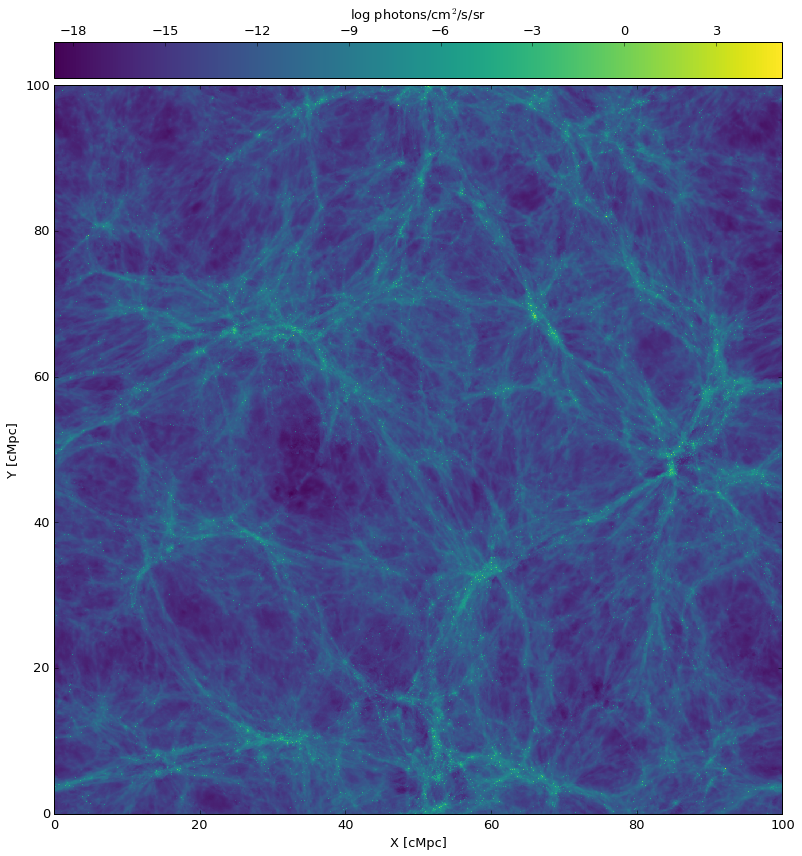

In [6]:
fig = plt.figure(figsize=(12, 12)); ax = fig.add_subplot(111)

data = data_tuple_100[0]; newsize = data_tuple_100[1]; factor = data_tuple_100[2];
size = 100.; xystarts = [0,0]

get_halpha_SB.makemap(data,size,ax,xystarts = xystarts)
plt.tight_layout()